# Visualizing high dimensional datasets uisng t-SNE and PCA on MNIST datasets

PCA stands for Principal component analysis.It is used for reducing the dimension .

# load MNIST data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('./train.csv')

print(df1.head(5))

labels = df1['label']
df2 = df1.drop('label',axis=1)

print(df2.head(5))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

C:\Users\RakeshS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


6


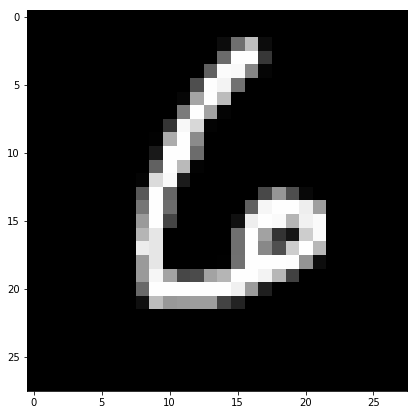

In [6]:
#display or plot a number
plt.figure(figsize=(7,7))
#initializing the index of the 
idx=784
#transforming the value from 2D-1D
grid_data = df2.iloc[idx].as_matrix().reshape(28,28)#iloc is used to acess the index
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show
print(labels[idx])

# 2D visualization using PCA

In [20]:
label = labels.head(42000)
data = df2.head(42000)

print('the shape of sample data',data.shape)


the shape of sample data (42000, 784)


# Preprocessing of data

In [21]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\RakeshS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RakeshS\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42000, 784)


In [22]:
#find the co-variance of the matrix A^T*T
sample_data = standardized_data

#matrix multiplication

co_varmat = np.matmul(sample_data.T,sample_data)
print(sample_data.shape)
print(co_varmat.shape)

(42000, 784)
(784, 784)


In [23]:
#finding the eigen values , first 2 highest numbers

from scipy.linalg import eigh

values,vectors = eigh(co_varmat,eigvals=(782,783))

print(vectors.shape)



(784, 2)


In [24]:
#finding the top two vectors

new_coordinates = np.matmul(vectors.T,sample_data.T)
print(new_coordinates.shape)

(2, 42000)


In [25]:
#attaching the new_coordinates vector with labes

new_coordinates = np.vstack((new_coordinates,label))
print(new_coordinates.shape)

dataframe = pd.DataFrame(data=new_coordinates.T,columns=("1st_principal","2_principal","labels"))
print(dataframe.head)

(3, 42000)
<bound method NDFrame.head of        1st_principal  2_principal  labels
0          -5.226445    -5.140478     1.0
1           6.032996    19.292332     0.0
2          -1.705813    -7.644503     1.0
3           5.836139    -0.474207     4.0
4           6.024818    26.559574     0.0
5          -0.713788     1.269197     0.0
6           6.028416    -6.139613     7.0
7           4.238571     0.147792     3.0
8          -1.671837    -0.598138     5.0
9          -2.182601     2.940684     3.0
10         -5.800594     0.530970     8.0
11         -2.840313    -5.089862     9.0
12         -1.789000    -8.135130     1.0
13         14.066481     0.943464     3.0
14          0.764763     6.205129     3.0
15         -1.042898    -8.023728     1.0
16          6.019213     0.440178     2.0
17        -10.119340     8.393430     0.0
18          1.371945    -6.819947     7.0
19          5.757946    11.687632     5.0
20         -5.424841    -3.688248     8.0
21         -7.264464     4.675588  

C:\Users\RakeshS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

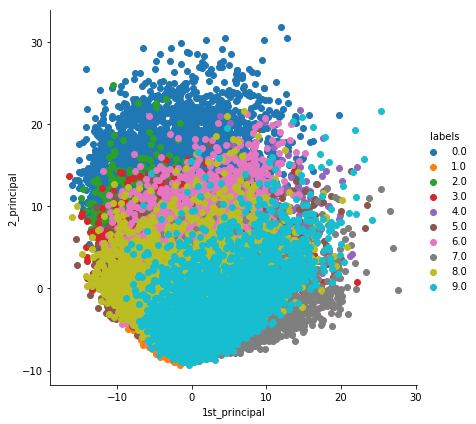

In [27]:
#plotting

sns.FacetGrid(dataframe,hue='labels',size=6).map(plt.scatter,"1st_principal","2_principal").add_legend()
plt.show